## choose image folders by its size to remove useless ones

In [1]:
import os
import pandas as pd
import numpy as np
import shutil

%matplotlib inline

## put image folders to scan

In [5]:
# make list of sub-folders

i = 0

current_dir = []
sub_dirs    = []
file_names  = []

for curDir, dirs, files in os.walk("image_folders_to_scan"):
    current_dir.append(curDir)
    sub_dirs.append(dirs)
    file_names.append(files)

sub_dir_names = sub_dirs[0]
    
#print(current_dir)
print(sub_dir_names)
print(file_names)

print('\nnumber of sub directries =  ', len(sub_dir_names))

['Deforum_20240317053601', 'Deforum_20240317053914', 'Deforum_20240317053945', 'Deforum_20240317054228', 'Deforum_20240317054552', 'Deforum_20240317054936', 'Deforum_20240317055241', 'Deforum_20240317055310', 'Deforum_20240317060100', 'Deforum_20240317060123', 'Deforum_20240317060140', 'Deforum_20240317060425', 'Deforum_20240317060443', 'Deforum_20240317061101', 'Deforum_20240317061749', 'Deforum_20240317061802', 'Deforum_20240317061841', 'Deforum_20240317062022', 'Deforum_20240317062048', 'Deforum_20240317062120', 'Deforum_20240317062208', 'Deforum_20240317062221', 'Deforum_20240317063129', 'Deforum_20240317063202', 'Deforum_20240317063219', 'Deforum_20240317063503', 'Deforum_20240317063708', 'Deforum_20240317063728', 'Deforum_20240317063755', 'Deforum_20240317063815', 'Deforum_20240317063903', 'Deforum_20240317063917', 'Deforum_20240317064216', 'Deforum_20240317064235', 'Deforum_20240317064257', 'Deforum_20240317064318', 'Deforum_20240317064341', 'Deforum_20240317064944', 'Deforum_20

In [6]:
# function to scan directory size

def get_dir_size(path='.'):
    total = 0
    with os.scandir(path) as it:
        for entry in it:
            if entry.is_file():
                total += entry.stat().st_size
            elif entry.is_dir():
                total += get_dir_size(entry.path)
    return total

In [7]:
# make table of sub-directry name and size

df_sub_dir_name_size = pd.DataFrame()

for i in range(len(sub_dir_names)):
    dir_path = 'image_folders_to_scan/' + sub_dir_names[i]
    df_sub_dir_name_size.loc[i, 'folder_name'] = dir_path
    df_sub_dir_name_size.loc[i, 'folder_size_MB'] = get_dir_size(dir_path) / 1000000

print(df_sub_dir_name_size.shape)
df_sub_dir_name_size.head()

(52, 2)


,folder_name,folder_size_MB
0,image_folders_to_scan/Deforum_20240317053601,89.439613
1,image_folders_to_scan/Deforum_20240317053914,12.682358
2,image_folders_to_scan/Deforum_20240317053945,86.645243
3,image_folders_to_scan/Deforum_20240317054228,88.046431
4,image_folders_to_scan/Deforum_20240317054552,84.360310


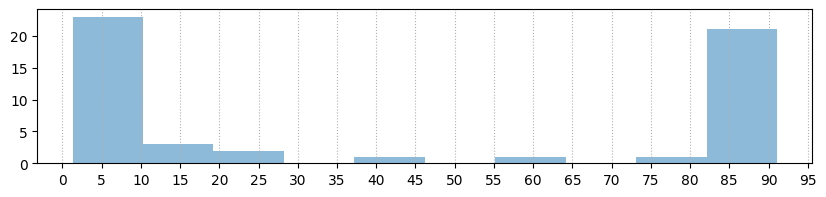

In [8]:
# histgram of folder size

plt.figure(figsize = (10, 2))
plt.hist(df_sub_dir_name_size['folder_size_MB'], alpha = 0.5)
x_axis_num = np.arange(0, 100, step = 5)
plt.xticks(x_axis_num)
plt.grid(axis = 'x', linestyle='dotted')

plt.show()

In [9]:
# threshold to USE and NOT USE

threshold = 80.0

In [10]:
df_folders_not_use = df_sub_dir_name_size[df_sub_dir_name_size['folder_size_MB'] < threshold]
print(len(df_folders_not_use))
df_folders_not_use.head()

30


,folder_name,folder_size_MB
1,image_folders_to_scan/Deforum_20240317053914,12.682358
6,image_folders_to_scan/Deforum_20240317055241,8.462068
8,image_folders_to_scan/Deforum_20240317060100,4.027930
9,image_folders_to_scan/Deforum_20240317060123,4.924376
11,image_folders_to_scan/Deforum_20240317060425,2.504386


In [11]:
folders_not_use = list(df_folders_not_use['folder_name'])
print(len(folders_not_use))
folders_not_use[:5]

30


['image_folders_to_scan/Deforum_20240317053914',
 'image_folders_to_scan/Deforum_20240317055241',
 'image_folders_to_scan/Deforum_20240317060100',
 'image_folders_to_scan/Deforum_20240317060123',
 'image_folders_to_scan/Deforum_20240317060425']

## move no use directries

In [12]:
def move_dirs(current_path, new_path):
    new_path = shutil.move(current_path, new_path)

In [13]:
new_path = 'image_folders_not_use'
for current_path in folders_not_use:
    move_dirs(current_path, new_path)

 ## delete no use folders

In [14]:
shutil.rmtree('image_folders_not_use')